In [1]:
# import required librariess
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
# importing the dataset (Public dataset from data.gov)
if __name__ == '__main__':
    # Override default pandas configuration
    pd.options.display.width = 0
    pd.options.display.max_rows = 10000
    pd.options.display.max_info_columns = 10000
    df = pd.read_csv('/Users/akshay/Downloads/Center_for_Medicare___Medicaid_Services__CMS____Medicare_Claims_data.csv')

In [3]:
# shape of the data
df.shape

(42640, 29)

In [4]:
#summary stats
df.describe()

,Year,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,42640.000000,42111.000000,42640.000000,42111.000000,42111.000000,42640.000000
mean,2008.500000,14.780896,14.572709,12.661509,17.074028,29.538462
std,2.872315,13.286487,13.333826,11.453615,17.910274,16.064317
min,2004.000000,0.400000,-2.000000,0.000000,1.100000,1.000000
25%,2006.000000,4.500000,4.400000,3.800000,5.000000,16.750000
50%,2008.500000,10.700000,10.400000,8.200000,12.700000,29.500000
75%,2011.000000,21.600000,21.500000,19.600000,23.400000,42.500000
max,2013.000000,333.300000,333.300000,94.200000,710.500000,59.000000


In [5]:
#check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        42640 non-null  int64  
 1   LocationAbbr                42640 non-null  object 
 2   LocationDesc                42640 non-null  object 
 3   DataSource                  42640 non-null  object 
 4   PriorityArea1               42640 non-null  object 
 5   PriorityArea2               42640 non-null  object 
 6   PriorityArea3               42640 non-null  object 
 7   PriorityArea4               42640 non-null  object 
 8   Category                    42640 non-null  object 
 9   Topic                       42640 non-null  object 
 10  Indicator                   42640 non-null  object 
 11  Data_Value_Type             42640 non-null  object 
 12  Data_Value_Unit             42640 non-null  object 
 13  Data_Value                  421

In [6]:
# identify numeric / non numeric columns in the data
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("Numeric columns: ", numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("Non numeric columns: ", non_numeric_cols)

Numeric columns:  ['Year' 'Data_Value' 'Data_Value_Alt' 'LowConfidenceLimit'
 'HighConfidenceLimit' 'LocationID']
Non numeric columns:  ['LocationAbbr' 'LocationDesc' 'DataSource' 'PriorityArea1'
 'PriorityArea2' 'PriorityArea3' 'PriorityArea4' 'Category' 'Topic'
 'Indicator' 'Data_Value_Type' 'Data_Value_Unit'
 'Data_Value_Footnote_Symbol' 'Data_Value_Footnote' 'Break_Out_Category'
 'Break_Out' 'CategoryId' 'TopicId' 'IndicatorID' 'Data_Value_TypeID'
 'BreakOutCategoryId' 'BreakOutId' 'GeoLocation']


<AxesSubplot:>

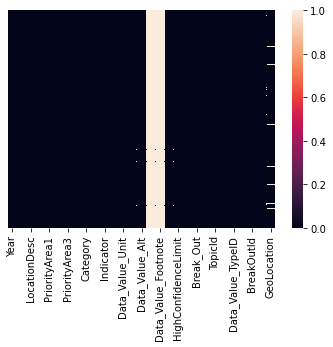

In [7]:
# visualize to identify blank values
sn.heatmap(df.isnull(),yticklabels=False)

In [8]:
# Looks like the data is really messy
# lets identify the percentage of missing values
rows, columns = df.shape
cell_count = rows * columns
number_of_nulls = df.isnull().sum().sum()
percentage_of_missing = (number_of_nulls / cell_count) * 100
print(f'Percentage of missing values: {percentage_of_missing}%')

df.isna().sum()

Percentage of missing values: 7.005644691725433%


Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                      529
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit              529
HighConfidenceLimit             529
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

In [9]:
# checking to see duplicates
df.duplicated().sum()

0

In [10]:
df.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
1,2005,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
2,2007,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Age,65+,C1,T4,MD301,Crude,BOC03,AGE06,59,NaN
3,2008,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Gender,Female,C1,T4,MD301,Crude,BOC02,GEN02,59,NaN
4,2004,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Overall,Overall,C1,T5,MD501,Crude,BOC01,OVR01,59,NaN


In [11]:
# first deal with NaN's in float datatype values
df.fillna({
    'Data_Value': 0,
    'LowConfidenceLimit': 0,
    'HighConfidenceLimit': 0,
    'GeoLocation': 0
}, inplace = True)

df.isnull().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                        0
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit                0
HighConfidenceLimit               0
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

In [12]:
df.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,0
1,2005,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,0
2,2007,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Age,65+,C1,T4,MD301,Crude,BOC03,AGE06,59,0
3,2008,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,...,Gender,Female,C1,T4,MD301,Crude,BOC02,GEN02,59,0
4,2004,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,...,Overall,Overall,C1,T5,MD501,Crude,BOC01,OVR01,59,0


In [13]:
# cleaning columns with irregular values
df.Data_Value_Footnote_Symbol.unique()

df.Data_Value_Footnote_Symbol.replace({
    '~' : np.NaN
}, inplace = True)

df.Data_Value_Footnote_Symbol.unique() # Data_Value_Footnote_Symbol column is fixed

to_replace = ['Heart Failure', 'Diseases of the Heart (Heart Disease)']

df.Topic.replace(to_replace, 'Other - Heart Failure', inplace = True)
df.Topic.replace('Acute Myocardial Infarction (Heart Attack)', 
                 'Acute Myocardial Infarction', inplace = True)

In [14]:
df.Data_Value_Footnote.unique()

# filtering numerator < 10 to seperate dataframe
num_less_than_10 = df.query('Data_Value_Footnote == "Statistically unstable estimates not presented [numerator <10]"')

# total 529 entries are identified with numerator < 10
num_less_than_10.shape

# Identifying the states where numerator < 10
num_less_than_10.LocationDesc.unique()

array(['North Dakota', 'Vermont', 'South Dakota', 'Idaho',
       'Washington, DC', 'Tennessee', 'Montana', 'Kentucky', 'Maine',
       'Mississippi', 'New Hampshire', 'West Virginia', 'Wyoming',
       'Alaska', 'Delaware', 'Alabama', 'Utah', 'Hawaii', 'Nebraska',
       'South Carolina', 'Arkansas', 'Minnesota', 'Oregon', 'Iowa'],
      dtype=object)

In [15]:
# identifying what claim it is
num_less_than_10.Topic.unique()

array(['Major Cardiovascular Disease', 'Other - Heart Failure',
       'Acute Myocardial Infarction', 'Coronary Heart Disease', 'Stroke'],
      dtype=object)

In [16]:
# lets explore couple of records to check if records or usable
num_less_than_10.loc[1821]
num_less_than_10.loc[4714]

Year                                                                       2013
LocationAbbr                                                                 ND
LocationDesc                                                       North Dakota
DataSource                                                             Medicare
PriorityArea1                                                              None
PriorityArea2                                                              None
PriorityArea3                                                              None
PriorityArea4                                                              None
Category                                                Cardiovascular Diseases
Topic                                              Major Cardiovascular Disease
Indicator                     Prevalence of major cardiovascular disease hos...
Data_Value_Type                                                           Crude
Data_Value_Unit                         

In [17]:
# total dataframe
rows, columns = df.shape
tot_count = rows * columns

# subset of dataframe with low numerator
rows, columns = num_less_than_10.shape
low_tot_count = rows * columns

# identify the percentage
percentage_with_low_numerator = (low_tot_count / tot_count) * 100
print('Percentage of numerator < 10 in the dataset: ', percentage_with_low_numerator)

Percentage of numerator < 10 in the dataset:  1.2406191369606003


In [18]:
# df.query('Topic == "Acute Myocardial Infarction"')

In [19]:
df.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                        0
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42640
Data_Value_Footnote           42111
LowConfidenceLimit                0
HighConfidenceLimit               0
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

In [20]:
# dropping unnecessary columns

columns_to_drop = ['Data_Value_Footnote_Symbol',
                   'Data_Value_Footnote',
                   'CategoryId',
                   'TopicId',
                   'BreakOutId',
                   'BreakOutCategoryId',
                   'LocationID',
                   'IndicatorID',
                   'LocationAbbr',
                   'Data_Value_TypeID',
                   'Data_Value_Alt',
                   'Data_Value',
                   'Data_Value_Unit']

df.drop(columns_to_drop, axis = 1, inplace = True)

<AxesSubplot:>

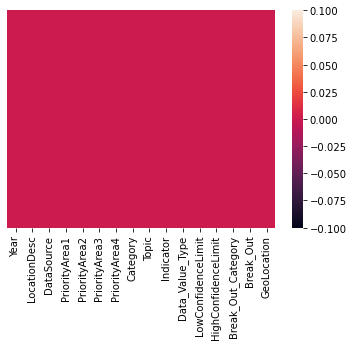

In [21]:
df.head()
sn.heatmap(df.isnull(),yticklabels=False) # now it's much better

In [22]:
# group based on the Topic
g = df.groupby('Topic')

cor_df = g.get_group('Coronary Heart Disease')
other_df = g.get_group('Other - Heart Failure')
ami_df = g.get_group('Acute Myocardial Infarction')
major_df = g.get_group('Major Cardiovascular Disease')
stroke_df = g.get_group('Stroke')

# segregate coronary df by age, gender, race
cor_category = cor_df.groupby('Break_Out_Category')
age_cor = cor_category.get_group('Age')
gender_cor = cor_category.get_group('Gender')
race_cor = cor_category.get_group('Race')

# ssegregate other df by age, gender, race
other_category = other_df.groupby('Break_Out_Category')
age_other = other_category.get_group('Age')
gender_other = other_category.get_group('Gender')
race_other = other_category.get_group('Race')

# ssegregate ami df by age, gender, race
ami_category = ami_df.groupby('Break_Out_Category')
age_ami = ami_category.get_group('Age')
gender_ami = ami_category.get_group('Gender')
race_ami = ami_category.get_group('Race')

# segregate major df by age, gender, race
major_category = major_df.groupby ('Break_Out_Category')
age_major = major_category.get_group('Age')
gender_major = major_category.get_group('Gender')
race_major = major_category.get_group('Race')

# segregate stroke df by age, gender, race
stroke_category = stroke_df.groupby('Break_Out_Category')
age_stroke = stroke_category.get_group('Age')
gender_stroke = stroke_category.get_group('Gender')
race_stroke = stroke_category.get_group('Race')

In [23]:
# concat the dataframes based on each bucket
age_to_concat = [age_cor,age_other,age_ami,age_major, age_stroke]
gender_to_concat = [gender_cor,gender_other,gender_ami,gender_major,gender_stroke]
race_to_concat = [race_cor,race_other,race_ami,race_major,race_stroke]

df_age = pd.concat(age_to_concat, ignore_index=True).sort_values('Year')
df_age = df_age.reset_index(drop=True)

df_gender = pd.concat(gender_to_concat, ignore_index = True).sort_values('Year')
df_gender = df_gender.reset_index(drop = True)

df_race = pd.concat(race_to_concat, ignore_index = True).sort_values('Year')
df_race = df_race.reset_index(drop = True)

In [24]:
# export to categories to excel

with pd.ExcelWriter('/Users/akshay/Downloads/CMS_Medicare_Claims_data.xlsx') as f:
    df_age.to_excel(f, sheet_name = 'Medicare - Age'),
    df_gender.to_excel(f, sheet_name = 'Medicare - Gender'),
    df_race.to_excel(f, sheet_name = 'Medicare - Race')